In [ ]:
!pip install scikit-learn scikit-image

In [6]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2

ds = fetch_openml ('mnist_784', as_frame = False )
x_train, x_test , y_train, y_test = train_test_split (ds.data, ds.target, test_size = 0.2, random_state = 42)

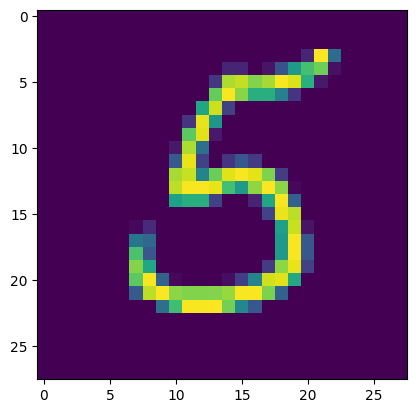

In [7]:
a = x_train[0].reshape((28, 28))
plt.imshow(a)

In [9]:
from sklearn import svm
# Fix typo in kernel parameter
classifier = svm.SVC(C=1.0, kernel='rbf', gamma='auto')
print("SVM classifier created successfully")

SVM classifier created successfully


In [ ]:
classifier.fit(x_train, y_train)
cprint("Training completed!")


In [ ]:
# Run classifier on test data and calculate classification error
print("Making predictions on test data...")
y_pred = classifier.predict(x_test)

# Calculate classification error
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test_int, y_pred)
classification_error = 1 - accuracy

print(f"Test set size: {len(y_test_int)}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Error: {classification_error:.4f}")
print(f"Number of misclassified samples: {sum(y_test_int != y_pred)} out of {len(y_test_int)}")


In [ ]:
# Generate and display 10-class confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

# Create confusion matrix
cm = confusion_matrix(y_test_int, y_pred)
print("10-Class Confusion Matrix:")
print("Rows represent true labels, columns represent predicted labels")
print(cm)

# Display confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix - MNIST Digit Classification')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
# Analyze patterns in the confusion matrix
print("\n=== CONFUSION MATRIX ANALYSIS ===")

# Calculate per-class accuracy
per_class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
print("\nPer-class accuracy:")
for i in range(10):
    print(f"Digit {i}: {per_class_accuracy[i]:.4f}")

# Find the most confused pairs
print("\nMost common misclassifications:")
# Create a copy of confusion matrix without diagonal (correct predictions)
cm_errors = cm.copy()
np.fill_diagonal(cm_errors, 0)

# Find top 10 most common errors
errors_flat = []
for i in range(10):
    for j in range(10):
        if cm_errors[i, j] > 0:
            errors_flat.append((cm_errors[i, j], i, j))

errors_flat.sort(reverse=True)
for count, true_label, pred_label in errors_flat[:10]:
    print(f"  {true_label} → {pred_label}: {count} times")

print(f"\nWorst performing digit: {np.argmin(per_class_accuracy)} (accuracy: {np.min(per_class_accuracy):.4f})")
print(f"Best performing digit: {np.argmax(per_class_accuracy)} (accuracy: {np.max(per_class_accuracy):.4f})")


In [ ]:
# Additional analysis: Show examples of misclassified digits
print("\n=== EXAMPLES OF MISCLASSIFIED DIGITS ===")

# Find indices of misclassified samples
misclassified_indices = np.where(y_test_int != y_pred)[0]

# Show first 12 misclassified examples
fig, axes = plt.subplots(3, 4, figsize=(12, 9))
fig.suptitle('Examples of Misclassified Digits', fontsize=16)

for i in range(min(12, len(misclassified_indices))):
    idx = misclassified_indices[i]
    row, col = i // 4, i % 4
    
    # Reshape and display the image
    image = x_test[idx].reshape(28, 28)
    axes[row, col].imshow(image, cmap='gray')
    axes[row, col].set_title(f'True: {y_test_int[idx]}, Pred: {y_pred[idx]}')
    axes[row, col].axis('off')

plt.tight_layout()
plt.show()

print(f"\nTotal misclassified samples shown: {min(12, len(misclassified_indices))} out of {len(misclassified_indices)}")
